In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To build sklearn model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
#THIS PROJECT IS A WORK IN PROGRESS

In [39]:
import winsound

def make_noise():
  duration = 1000  # milliseconds
  freq = 440  # Hz
  winsound.Beep(freq, duration)

In [176]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("Tourism.csv")
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 4888 rows and 20 columns.


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,201676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


In [4]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [5]:
df.shape

(4888, 19)

In [6]:
df.nunique()

ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending=False)


DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Gender                        0
CityTier                      0
Occupation                    0
ProductPitched                0
NumberOfPersonVisiting        0
Designation                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
ProdTaken                     0
dtype: int64

In [5]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

NameError: name 'num_missing' is not defined

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


## Obrservations:
* There are 4888 entries with 20 different columns.
* CustomerID droped because it had no value
* Gender needs to be cleaned up as it has three unique values
* Multiple columns have missing values
* Marital Satus has four unique values which will require attention


In [6]:
df['Gender'] = df['Gender'].str.replace(" ","")
df['Gender'] = df['Gender'].str.lower()

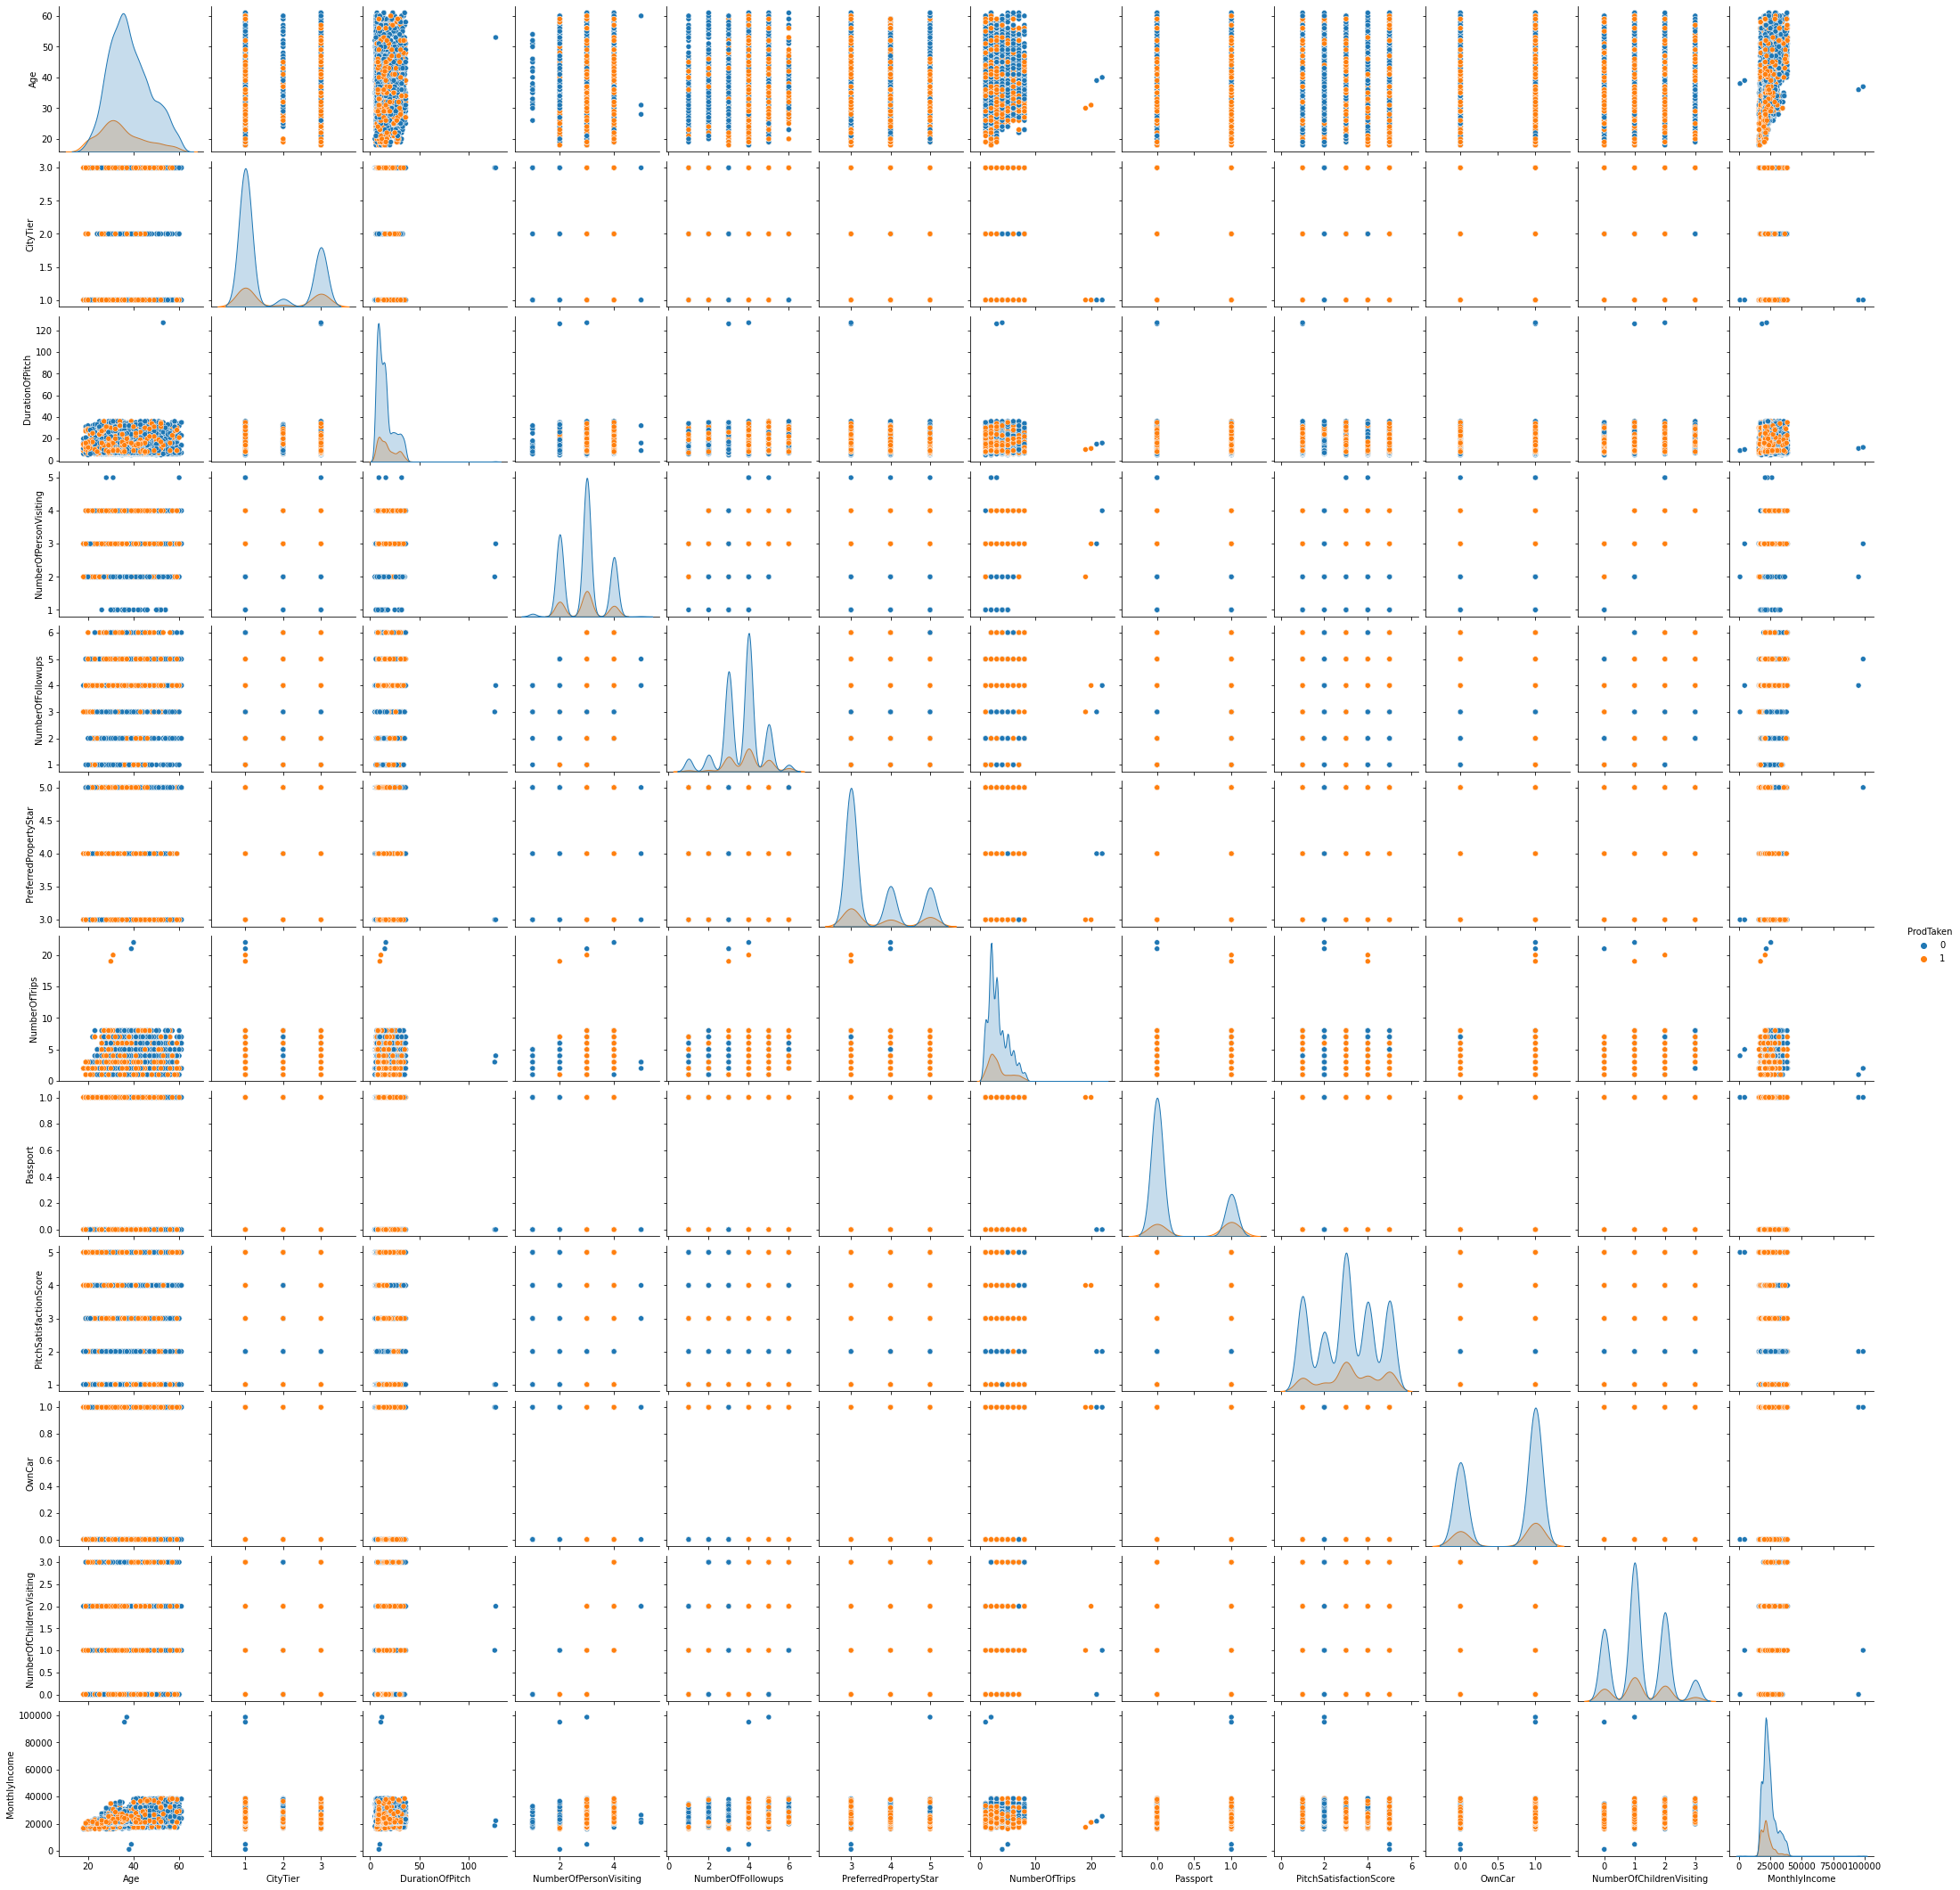

In [90]:
sns.pairplot(df,hue='ProdTaken')
plt.show()
make_noise()

In [89]:
make_noise

<function __main__.make_noise()>

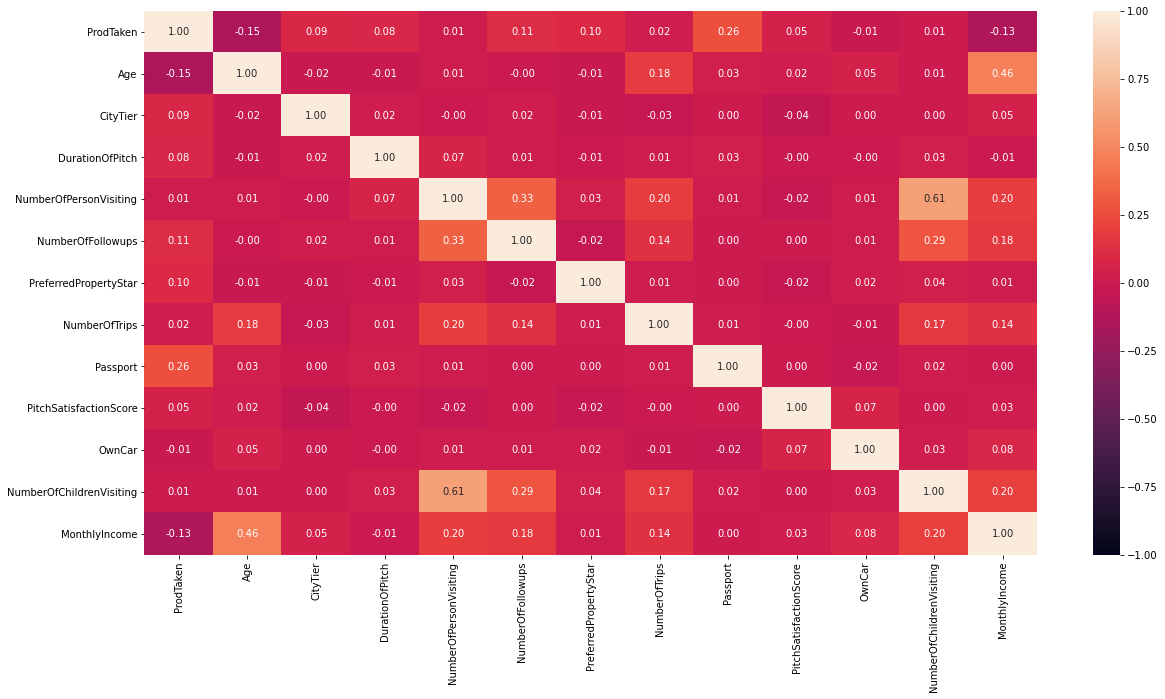

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [22]:

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

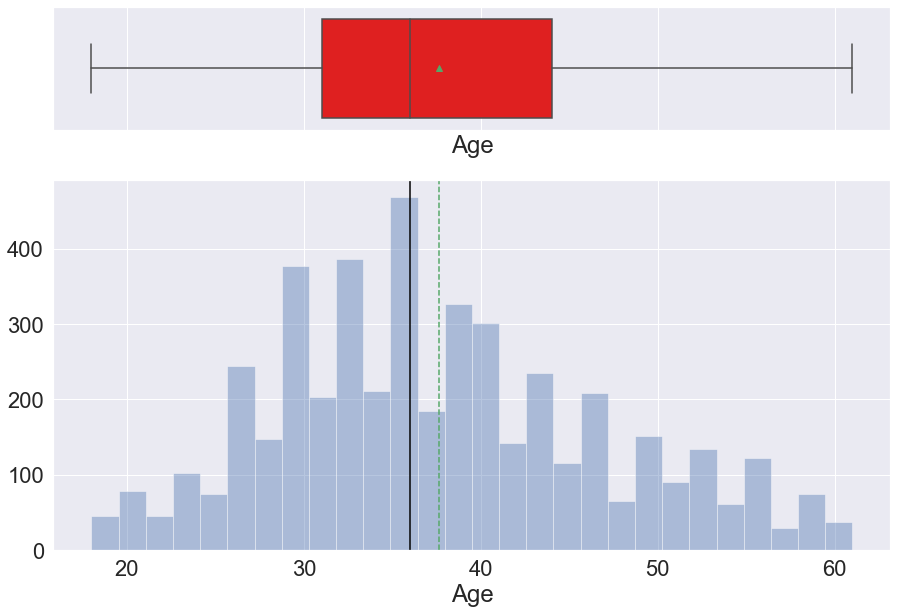

In [23]:
histogram_boxplot(df["Age"])

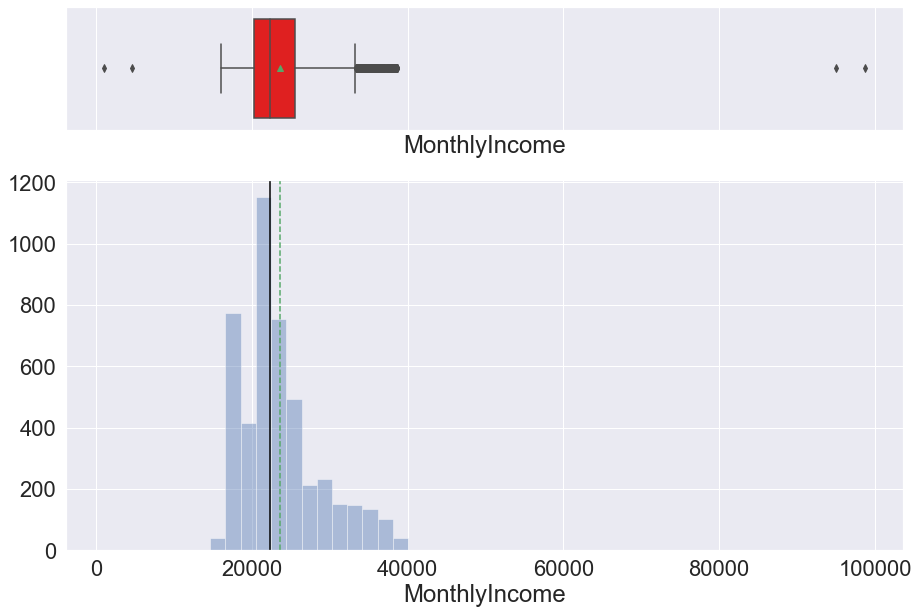

In [26]:
histogram_boxplot(df["MonthlyIncome"])

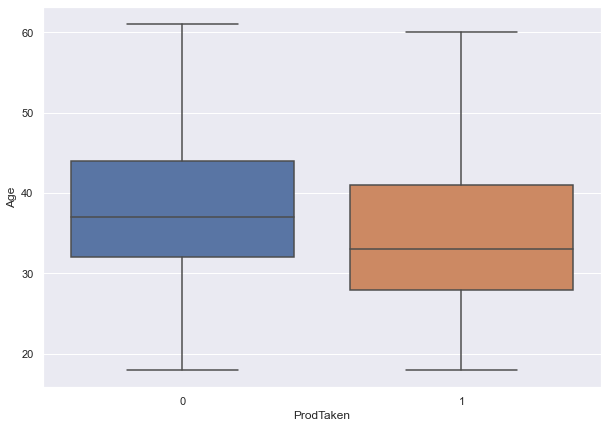

In [41]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="ProdTaken", y="Age", data=df, orient="vertical")
plt.show()

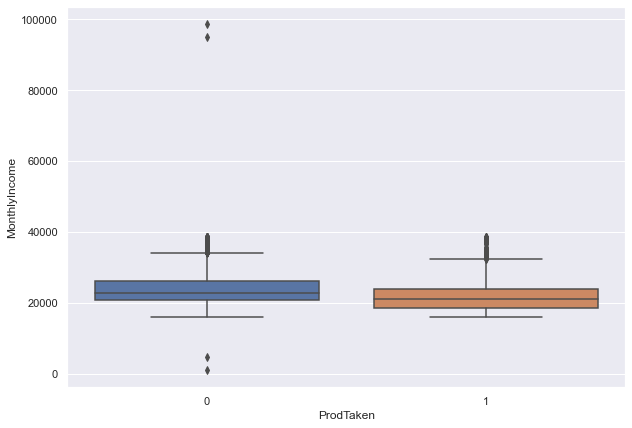

In [112]:

sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="ProdTaken", y="MonthlyIncome", data=df, orient="vertical")
plt.show()

Observation:  Even with outliers you can see that those with slightly lower income levels bought the product.  

In [35]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


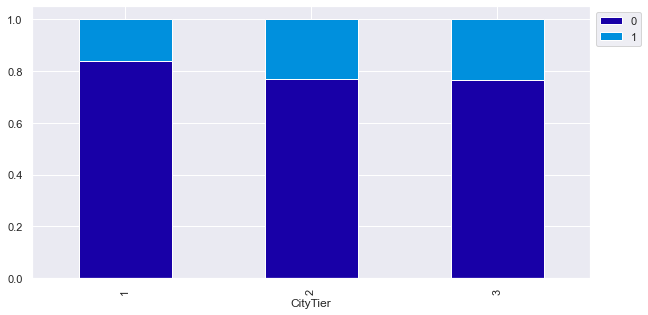

In [36]:
stacked_plot(df['CityTier'])

ProdTaken     0    1   All
Gender                    
female     1630  342  1972
male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


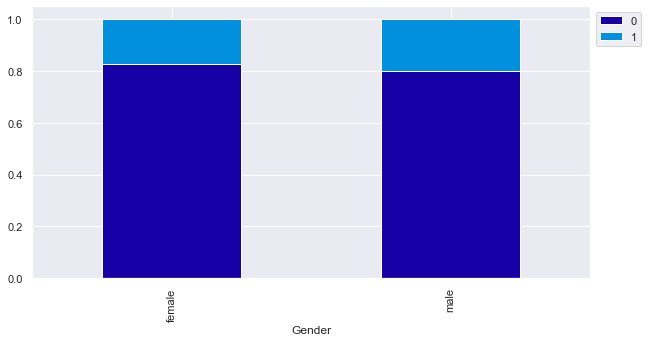

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


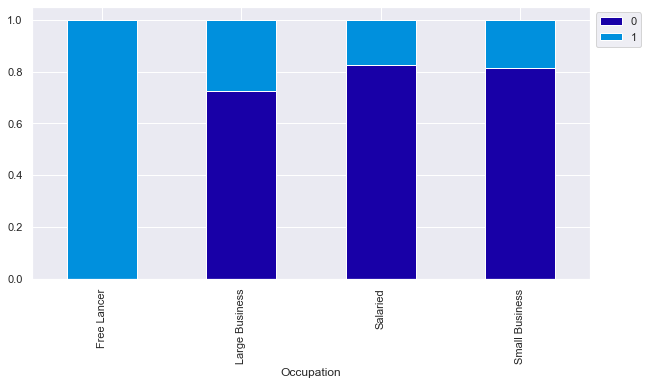

In [44]:
stacked_plot(df['Occupation'])

In [7]:
df1 = df.copy()

In [8]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return data

In [9]:
df1 = treat_outliers(df1, 'MonthlyIncome')

In [10]:
df1["TypeofContact"].fillna("Unknown", inplace = True)

In [108]:
df1['Age'] = df1['Age'].fillna(df1['Age'].mean()) 
df1['DurationOfPitch'] = df1['DurationOfPitch'].fillna(df1['DurationOfPitch'].mean()) 
df1['NumberOfFollowups'] = df1['NumberOfFollowups'].fillna(df1['NumberOfFollowups'].mean())
df1['PreferredPropertyStar'] = df1['PreferredPropertyStar'].fillna(df1['PreferredPropertyStar'].mean())
df1['NumberOfTrips'] = df1['NumberOfTrips'].fillna(df1['NumberOfTrips'].mean()) 
df1['NumberOfChildrenVisiting'] = df1['NumberOfChildrenVisiting'].fillna(df1['NumberOfChildrenVisiting'].mean())
df1['MonthlyIncome'] = df1['MonthlyIncome'].fillna(df1['MonthlyIncome'].mean())

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4888 non-null   float64
 2   TypeofContact             4888 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4888 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4888 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4888 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4888 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [12]:
df2 = df1.copy()

In [13]:
df2 = pd.get_dummies(df2, columns=["TypeofContact", "Occupation",'ProductPitched','MaritalStatus', 'Designation', 'Gender'])

print(df2.columns)


Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome',
       'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry',
       'TypeofContact_Unknown', 'Occupation_Free Lancer',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'ProductPitched_Basic',
       'ProductPitched_Deluxe', 'ProductPitched_King',
       'ProductPitched_Standard', 'ProductPitched_Super Deluxe',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_AVP',
       'Designation_Executive', 'Designation_Manager',
       'Designation_Senior Manager', 'Designation_VP', 'Gender_female',
       'Gender_male'],
      dtype='object')


In [14]:
np.random.seed(1)
df2.sample(n=10)

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Company Invited,TypeofContact_Self Enquiry,TypeofContact_Unknown,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,Gender_female,Gender_male
3015,0,27.0,1,7.0,4,6.0,3.0,5.0,0,4,1,3.000000,23042.0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1242,0,40.0,3,13.0,2,3.0,4.0,2.0,0,4,1,1.187267,33408.5,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
3073,0,29.0,2,15.0,4,5.0,3.0,3.0,0,2,0,2.000000,23614.0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
804,0,48.0,1,6.0,2,1.0,3.0,3.0,0,2,0,0.000000,31885.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
3339,0,32.0,1,18.0,4,4.0,5.0,3.0,1,2,0,3.000000,25511.0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3080,1,36.0,1,32.0,4,4.0,4.0,3.0,1,3,0,1.000000,20700.0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2851,0,46.0,1,17.0,4,4.0,3.0,5.0,0,5,1,1.000000,21332.0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2883,1,32.0,1,27.0,4,4.0,3.0,5.0,0,3,1,1.000000,28502.0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
1676,0,22.0,1,11.0,2,1.0,4.0,2.0,1,4,1,0.000000,17328.0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1140,0,44.0,1,13.0,2,3.0,3.0,1.0,1,4,1,1.000000,33408.5,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0


In [15]:
X = df2.drop("ProdTaken" , axis=1)
y = df2.pop("ProdTaken")

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [17]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #F1 scor of the model
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 on training set : ",f1_score(y_train,pred_train))
        print("F1 on test set : ",f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

Model Building

Bagging

Bagging Classifier

In [19]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [20]:
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9938614440222158
Accuracy on test set :  0.907293796864349
Recall on training set :  0.9704968944099379
Recall on test set :  0.6014492753623188
Precision on training set :  0.9968102073365231
Precision on test set :  0.8645833333333334
F1 on training set :  0.9834775767112511
F1 on test set :  0.7094017094017094


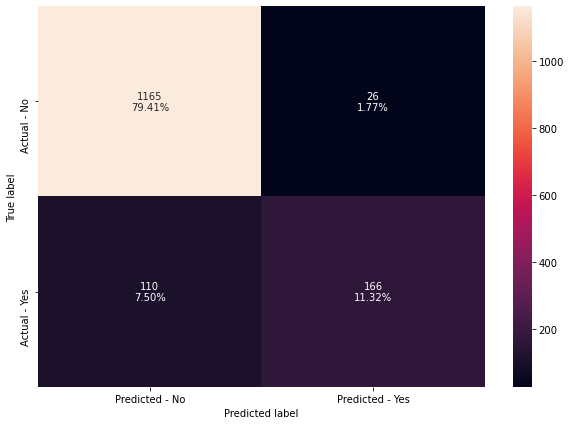

In [104]:
make_confusion_matrix(bagging_estimator,y_test)

Bagging Improvement

In [22]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

In [52]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9991230634317451
Accuracy on test set :  0.9175187457396047
Recall on training set :  0.9953416149068323
Recall on test set :  0.5942028985507246
Precision on training set :  1.0
Precision on test set :  0.9479768786127167
F1 on training set :  0.9976653696498053
F1 on test set :  0.730512249443207


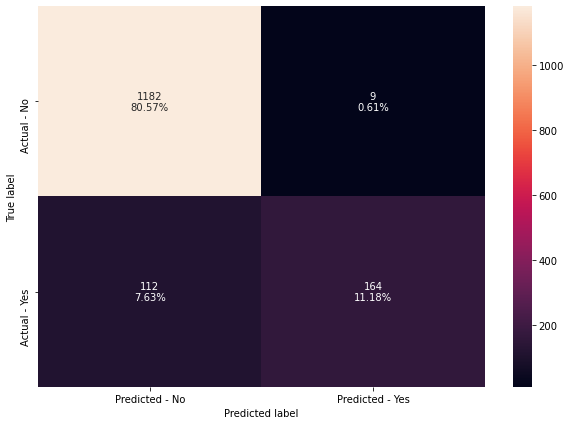

In [53]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

In [47]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.3,1:0.7},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.3,
                                                                      1: 0.7},
                                                        random_state=1),
                  random_state=1)

In [48]:
bagging_estimator_score=get_metrics_score(bagging_wt)

Accuracy on training set :  0.9932768196433791
Accuracy on test set :  0.9004771642808452
Recall on training set :  0.9658385093167702
Recall on test set :  0.5579710144927537
Precision on training set :  0.9983948635634029
Precision on test set :  0.8651685393258427
F1 on training set :  0.9818468823993686
F1 on test set :  0.6784140969162996


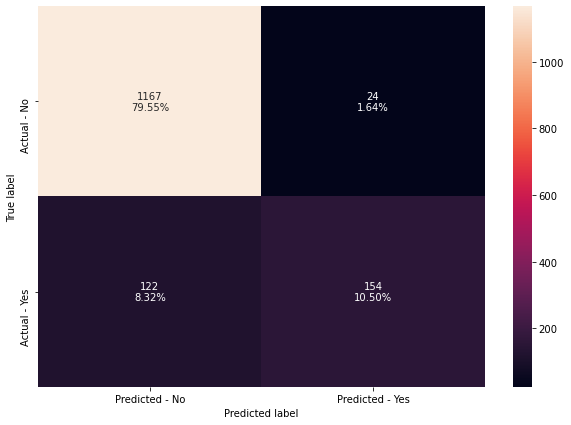

In [49]:
make_confusion_matrix(bagging_wt,y_test)

Random Forrest

In [51]:
#Train the random forest classifier
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [52]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9141104294478528
Recall on training set :  1.0
Recall on test set :  0.5797101449275363
Precision on training set :  1.0
Precision on test set :  0.9411764705882353
F1 on training set :  1.0
F1 on test set :  0.7174887892376681


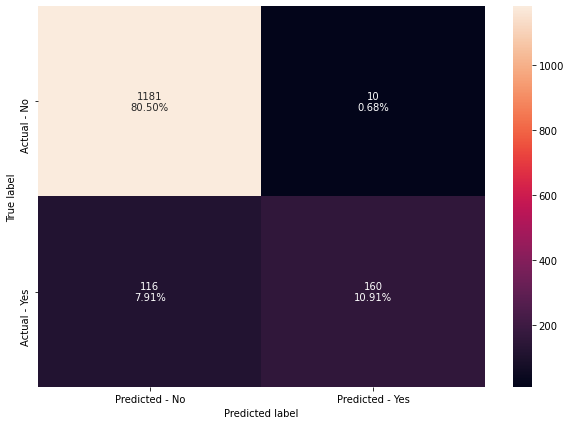

In [53]:
make_confusion_matrix(rf,y_test)

**Random forest with class weights**

In [55]:
rf_wt = RandomForestClassifier(class_weight={0:0.3,1:0.7}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

In [56]:
rf_wt_score=get_metrics_score(rf_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.912747102931152
Recall on training set :  1.0
Recall on test set :  0.5688405797101449
Precision on training set :  1.0
Precision on test set :  0.9457831325301205
F1 on training set :  1.0
F1 on test set :  0.7104072398190046


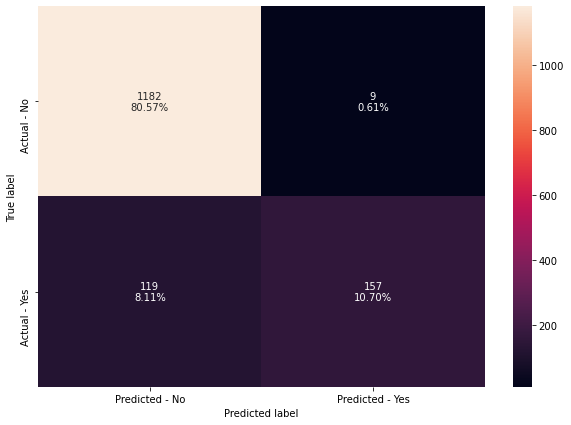

In [57]:
make_confusion_matrix(rf_wt,y_test)

Random Forrest Improvement

In [24]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250,300],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=150, random_state=1)

In [25]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9105524700380005
Accuracy on test set :  0.874573960463531
Recall on training set :  0.5559006211180124
Recall on test set :  0.42028985507246375
Precision on training set :  0.9470899470899471
Precision on test set :  0.8285714285714286
F1 on training set :  0.700587084148728
F1 on test set :  0.5576923076923077


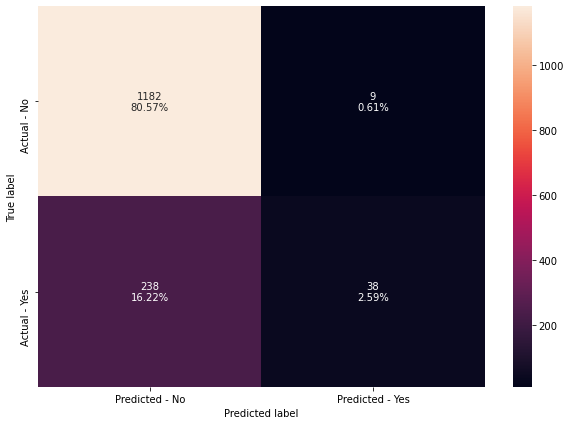

In [66]:
make_confusion_matrix(rf_estimator_tuned,y_test)

Decision Tree

In [26]:
dtmodel = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [27]:
dtmodel_score = get_metrics_score (dtmodel)

Accuracy on training set :  1.0
Accuracy on test set :  0.8957055214723927
Recall on training set :  1.0
Recall on test set :  0.6811594202898551
Precision on training set :  1.0
Precision on test set :  0.7430830039525692
F1 on training set :  1.0
F1 on test set :  0.7107750472589792


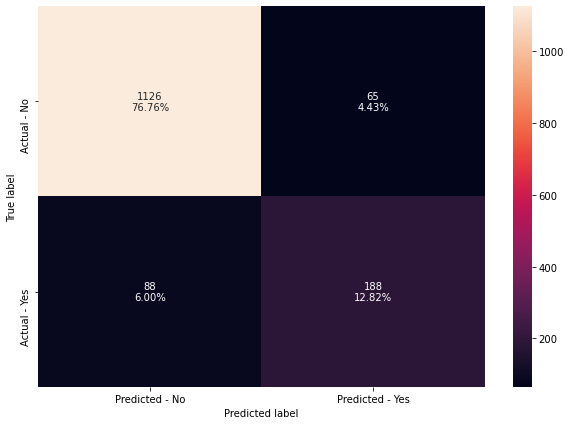

In [28]:
make_confusion_matrix(dtmodel,y_test)

Decision Tree Improvement

In [44]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.3,1:0.7},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [ 10, 15, 20, 25, 30, 35 ],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)
make_noise()
# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=2,
                       max_leaf_nodes=10, min_impurity_decrease=0.01,
                       random_state=1)

In [45]:
dtmodel__estimator_score = get_metrics_score (dtree_estimator)

Accuracy on training set :  0.8213972522654195
Accuracy on test set :  0.8411724608043627
Recall on training set :  0.3416149068322981
Recall on test set :  0.3695652173913043
Precision on training set :  0.5405405405405406
Precision on test set :  0.6335403726708074
F1 on training set :  0.4186489058039962
F1 on test set :  0.4668192219679634


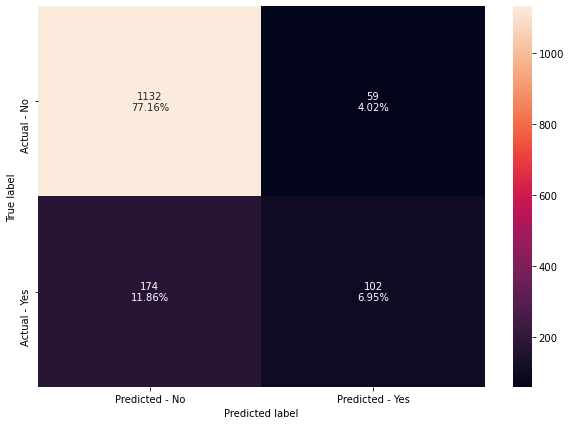

In [42]:
make_confusion_matrix(dtree_estimator,y_test)

In [60]:
# defining list of models
models = [bagging_estimator
            ,bagging_wt
            ,rf
            ,rf_wt
            ,dtmodel
            ,bagging_estimator_tuned
            ,rf_estimator_tuned
            ,dtree_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
#f1_train = []
#f1_test = []

# looping through all the models to get the accuracy, recall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    #f1_train.append(np.round(j[6],2))
    #f1_test.append(np.round(j[7],2))

In [63]:
comparison_frame = pd.DataFrame({'Model':["bagging_estimator"
            ,"bagging_wt"
            ,"rf"
            ,"rf_wt"
            ,"dtmodel"
            ,"bagging_estimator_tuned"
            ,"rf_estimator_tuned"
            ,"dtree_estimator"], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test
                                            '})
comparison_frame

SyntaxError: EOL while scanning string literal (<ipython-input-63-e0b1b99b406f>, line 12)

Boosting

AdaBoost

In [64]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [65]:
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8494592224495762
Accuracy on test set :  0.8479890933878664
Recall on training set :  0.32608695652173914
Recall on test set :  0.32608695652173914
Precision on training set :  0.7216494845360825
Precision on test set :  0.7086614173228346
F1 on training set :  0.4491978609625668
F1 on test set :  0.4466501240694789


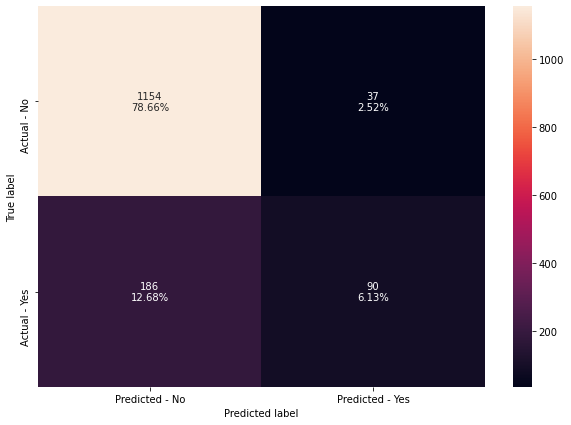

In [66]:
make_confusion_matrix(abc,y_test)

Adaboost Improvement

In [70]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100, random_state=1)

In [72]:
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9915229465068693
Accuracy on test set :  0.8950238582140423
Recall on training set :  0.9596273291925466
Recall on test set :  0.6304347826086957
Precision on training set :  0.9951690821256038
Precision on test set :  0.7699115044247787
F1 on training set :  0.9770750988142292
F1 on test set :  0.6932270916334662


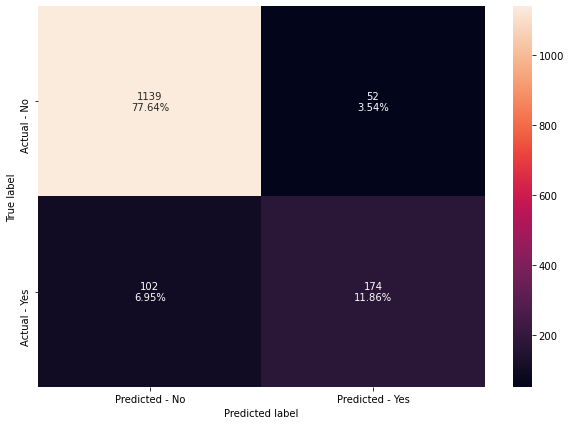

In [73]:
make_confusion_matrix(abc_tuned,y_test)

Gradient Boost

In [74]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [75]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8871674948845367
Accuracy on test set :  0.8738922972051807
Recall on training set :  0.4673913043478261
Recall on test set :  0.4166666666666667
Precision on training set :  0.875
Precision on test set :  0.8273381294964028
F1 on training set :  0.6093117408906883
F1 on test set :  0.5542168674698795


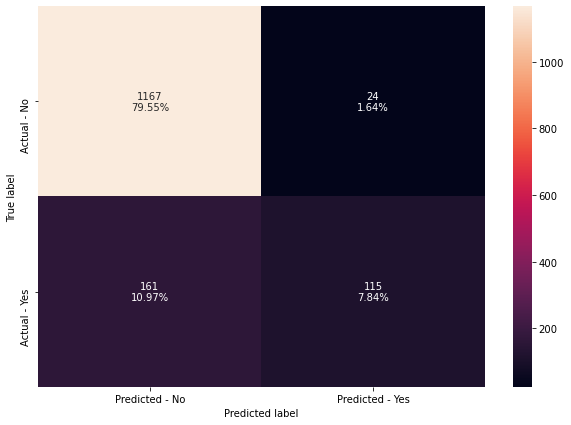

In [76]:
make_confusion_matrix(gbc,y_test)

Gradient Boost Improvement

In [77]:
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

In [79]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8871674948845367
Accuracy on test set :  0.8738922972051807
Recall on training set :  0.4673913043478261
Recall on test set :  0.4166666666666667
Precision on training set :  0.875
Precision on test set :  0.8273381294964028
F1 on training set :  0.6093117408906883
F1 on test set :  0.5542168674698795


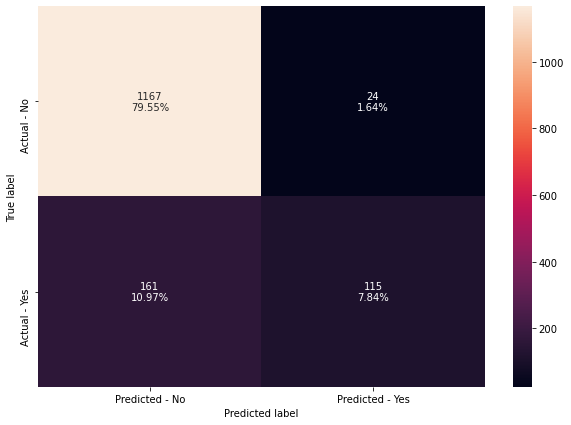

In [80]:
make_confusion_matrix(gbc,y_test)

XGBoost

In [92]:
xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [93]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9991230634317451
Accuracy on test set :  0.9263803680981595
Recall on training set :  0.9953416149068323
Recall on test set :  0.6884057971014492
Precision on training set :  1.0
Precision on test set :  0.8962264150943396
F1 on training set :  0.9976653696498053
F1 on test set :  0.7786885245901639


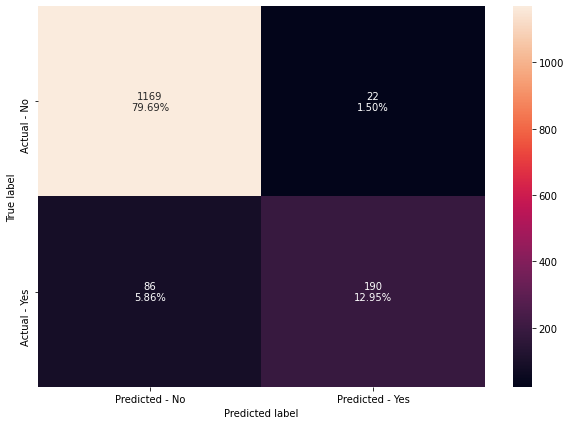

In [94]:
make_confusion_matrix(xgb,y_test)

XGBoost Imrpovement

In [84]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [105]:
make_noise()

In [106]:
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9944460684010523
Accuracy on test set :  0.9250170415814588
Recall on training set :  0.9984472049689441
Recall on test set :  0.8079710144927537
Precision on training set :  0.972768532526475
Precision on test set :  0.7964285714285714
F1 on training set :  0.9854406130268198
F1 on test set :  0.802158273381295


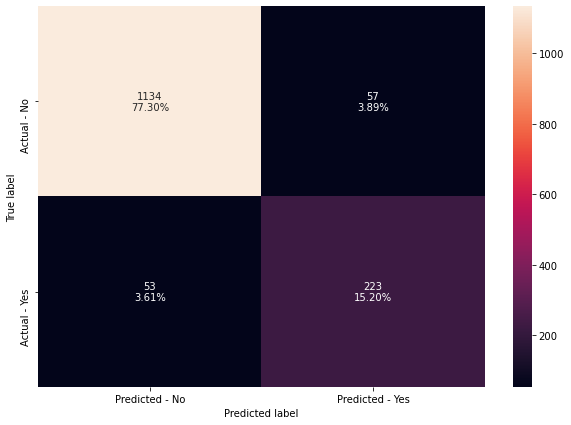

In [107]:
make_confusion_matrix(xgb_tuned,y_test)

Stacking

In [98]:
estimators=[('Decision Tree', dtree_estimator),('Random Forest', rf_estimator_tuned),
           ('Gradient Boosting', bagging_estimator_tuned), ("abc_tuned", abc_tuned ), ("gbc_tuned",gbc_tuned), ("Gradient Boost Tuned",xgb_tuned )]
final_estimator=XGBClassifier(random_state=1,eval_metric='logloss')

In [99]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.3,
                                                                     1: 0.7},
                                                       max_depth=2,
                                                       max_leaf_nodes=10,
                                                       min_impurity_decrease=0.01,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features=0.6000000000000001,
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=5,
                                                       n_estimators=150,
                                                       random_state=1)),
                            

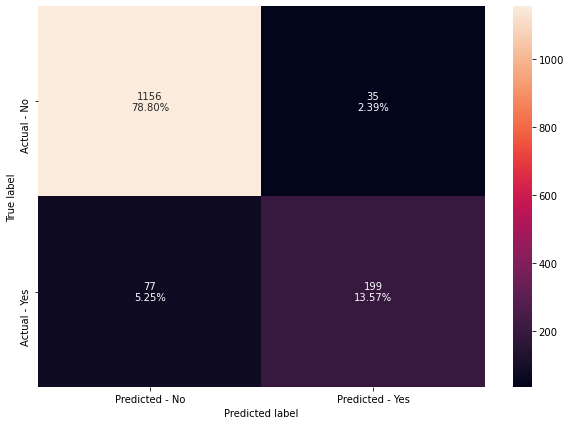

In [100]:
make_confusion_matrix(stacking_estimator,y_test)

In [101]:
xgb_tuned_score=get_metrics_score(stacking_estimator)

Accuracy on training set :  0.9982461268634902
Accuracy on test set :  0.923653715064758
Recall on training set :  0.9937888198757764
Recall on test set :  0.7210144927536232
Precision on training set :  0.9968847352024922
Precision on test set :  0.8504273504273504
F1 on training set :  0.9953343701399688
F1 on test set :  0.780392156862745


In [102]:
# defining list of models
models = [bagging_estimator
            ,bagging_wt
            ,rf
            ,rf_wt
            ,dtmodel
            ,bagging_estimator_tuned
            ,rf_estimator_tuned
            ,dtree_estimator
            ,abc
            ,abc_tuned
            ,gbc
            ,gbc_tuned
            ,xgb
            ,xgb_tuned
            ,stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [103]:
comparison_frame = pd.DataFrame({'Model':["bagging_estimator"
            ,"bagging_wt"
            ,"rf"
            ,"rf_wt"
            ,"dtmodel"
            ,"bagging_estimator_tuned"
            ,"rf_estimator_tuned"
            ,"dtree_estimator","abc"
            ,"abc_tuned"
            ,"gbc"
            ,"gbc_tuned"
            ,"xbc"
            ,"xbc_tuned"
            ,"stacking_estimator"], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,bagging_estimator,0.99,0.91,0.97,0.60,1.00,0.86
1,bagging_wt,0.99,0.90,0.97,0.56,1.00,0.87
2,rf,1.00,0.91,1.00,0.58,1.00,0.94
3,rf_wt,1.00,0.91,1.00,0.57,1.00,0.95
4,dtmodel,1.00,0.90,1.00,0.68,1.00,0.74
5,bagging_estimator_tuned,1.00,0.92,1.00,0.64,1.00,0.89
6,rf_estimator_tuned,0.91,0.87,0.56,0.42,0.95,0.83
7,dtree_estimator,0.82,0.84,0.34,0.37,0.54,0.63
8,abc,0.85,0.85,0.33,0.33,0.72,0.71
9,abc_tuned,0.99,0.90,0.96,0.63,1.00,0.77
